In [1]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 482.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 48.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1
    Uninstalling torchvision-0.15.1:
      Successfully uninstalled torchvision-0.15.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1
    Uninstalling torchaudio-2.0.1:
      Successfully uninstalled torchaudio-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depend

In [2]:
!pip install torchdata==0.5.1 torchtext==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.4 MB/s eta 0:00:0000:01
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1
  Attempting uninstall: torchdata
    Found existing installation: torchdata 0.6.0
    Uninstalling torchdata-0.6.0:
      Successfully uninstalled torchdata-0.6.0


In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu117.html

Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.7 MB/s eta 0:00:0000:010:01


In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=0d17b9c4c54963047e79b4d8b4aead42ef37ade0683418c4cdba5a6a635810bd
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [5]:
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_scatter import scatter_mean
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
from torch_geometric.nn import MetaLayer

In [5]:
df = pd.read_csv("GNN_data.csv")
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'node_code', 'node_type',
       'wlan_code', 'x(m)', 'y(m)', 'z(m)', 'central_freq(GHz)',
       'channel_bonding_model', 'primary_channel', 'min_channel_allowed',
       'max_channel_allowed', 'tpc_default(dBm)', 'cca_default(dBm)',
       'traffic_model', 'traffic_load[pkt/s]', 'packet_length',
       'num_packets_aggregated', 'capture_effect_model', 'capture_effect_thr',
       'constant_per', 'pifs_activated', 'cw_adaptation', 'cont_wind',
       'cont_wind_stage', 'throughput', 'sinr', 'rssi', 'airtime', 'int_map',
       'distance', 'distance_mean', 'distance_std', 'sinr_mean', 'sinr_std',
       'rssi_mean', 'rssi_std', 'num_stations', 'airtime_0', 'airtime_1',
       'airtime_2', 'airtime_3', 'airtime_4', 'airtime_5', 'airtime_6',
       'airtime_7', 'deployment', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', 'air_time_mean'],
      dtype='object')

In [6]:
# df.isna().sum()
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1'],axis=1,inplace=True)

In [7]:
df.head()

,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,...,3,4,5,6,7,8,9,10,11,air_time_mean
0,0,AP_A,0,A,7.5000,8.3333,8.3417,5.0,4,0,...,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,-103.64,-108.92,-119.3,25.15
1,1,STA_A1,1,A,12.0627,4.6918,5.0670,5.0,4,0,...,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,-103.64,-108.92,-119.3,25.15
2,2,STA_A2,1,A,8.2712,4.8383,9.9676,5.0,4,0,...,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,-103.64,-108.92,-119.3,25.15
3,3,STA_A3,1,A,8.4824,3.5287,8.9153,5.0,4,0,...,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,-103.64,-108.92,-119.3,25.15
4,4,STA_A4,1,A,1.3639,1.8250,8.3635,5.0,4,0,...,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,-103.64,-108.92,-119.3,25.15


In [8]:
for idx,val in df.iterrows():
    df.at[idx,"wlan_code_index"] = ord(df.at[idx,"wlan_code"])-65

In [69]:
df.to_csv("gnn_wlan_code_index.csv")

In [9]:
df = pd.read_csv("gnn_wlan_code_index.csv")

In [10]:
df[30:40]

,Unnamed: 0.1,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,...,4,5,6,7,8,9,10,11,air_time_mean,wlan_code_index
30,30,30,STA_C3,1,C,36.0658,-0.4417,3.3560,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
31,31,31,STA_C4,1,C,39.5195,4.4223,7.5467,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
32,32,32,STA_C5,1,C,41.8892,9.0823,6.5423,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
33,33,33,STA_C6,1,C,44.1040,13.2666,7.7821,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
34,34,34,STA_C7,1,C,41.5469,8.2323,6.9510,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
35,35,35,STA_C8,1,C,46.7212,5.1596,7.4883,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
36,36,36,STA_C9,1,C,43.2725,6.9606,5.6692,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
37,37,37,STA_C10,1,C,28.4262,5.5272,7.0083,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
38,38,38,STA_C11,1,C,28.5546,8.4945,5.5481,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0
39,39,39,STA_C12,1,C,31.7557,10.6870,4.5192,5.0,4,...,-98.22,-85.32,-78.93,-82.25,-108.77,-103.51,-97.22,-100.68,10.70625,2.0


In [31]:
device = torch.device("cuda" if torch.cuda.is_available()  else "cpu" )
device

device(type='cuda')

In [10]:
def get_int_map(dep):
    dep = df.loc[df["deployment"]==dep]
    dep = dep.reset_index(drop=True)
    return dep

In [13]:
t1 = get_int_map(100)

In [14]:
df = df[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)','z(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'rssi', 'node_type',
            'sinr', 'air_time_mean', 'deployment',"channel_bonding_model","throughput"]]

In [13]:
df.to_csv("required_format.csv")

In [6]:
df = pd.read_csv("/kaggle/input/requiredformattpml/required_format.csv")

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,primary_channel,min_channel_allowed,max_channel_allowed,rssi,node_type,sinr,air_time_mean,deployment,channel_bonding_model,throughput
0,0,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-55.42,0,35.68,25.15,0.0,4,104.96
1,1,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-62.31,1,26.99,25.15,0.0,4,7.68
2,2,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-55.42,1,35.68,25.15,0.0,4,11.09
3,3,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-58.23,1,33.42,25.15,0.0,4,14.51
4,4,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-66.64,1,26.83,25.15,0.0,4,11.95


In [44]:
# Creating individual graphs
# This assumes all APs and STAs are connected to each other
def create_graph(split,split_y,deployment,device):
    dep = get_int_map(deployment)
    dep_y = dep["throughput"]
    dep_x = dep[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)','z(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'rssi', 'node_type',
            'sinr', 'air_time_mean', 'deployment',"channel_bonding_model"]]
    #print(dep_x)
    dep_reset = dep.reset_index(drop=True)
    ap_index = {}
    out = dep_reset[dep_reset["node_type"] == 0]
    for i in range(len(out)):
        ap_index[out.index[i]] = i
    #print(ap_index)
    node_features = dep_x.iloc[:,12:].values
    # print(node_features)
    #edge_features = dep.iloc[:,:12].values - here each node has been given an edge feature
    # need to give each edge an edge feature
    node_targets = dep_y.values
    node_features = torch.tensor(node_features, dtype=torch.float,device=device)
    print(node_features.shape)
    #edge_features = torch.tensor(edge_features, dtype=torch.float)
    node_targets = torch.tensor(node_targets, dtype=torch.float,device=device)
    # Add edges here for each deployment
    edges = []
    edge_features = []
    edge_index = []
    for i in range(len(dep)):
        for j in range(len(dep)):
            if (i != j and (dep["node_type"].iloc[i] == 0 and dep["node_type"].iloc[j] == 0)) or (i !=j and (dep["node_type"].iloc[i] == 1 and dep["node_type"].iloc[j] == 0)):
                edges.append([i,j])
    #print(edges)
    edges2=edges
    edges = torch.tensor(edges, dtype=torch.float,device=device)
    #print("Edges: ", edges, edges.shape)
    # edge_index = torch.tensor(edges, dtype=torch.long)
    edge_index = torch.tensor(edges,dtype=torch.long,device=device)
    edge_index = edge_index.t().contiguous()
    #print(edges.detach(), edges.shape)
    print(edges.shape[0])
    for i in range(edges.shape[0]):
        # print(dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]])
        i_pos = np.asarray([dep.at[edges2[i][0],"x(m)"],dep.at[edges2[i][0],"y(m)"],dep.at[edges2[i][0],"z(m)"]])
        j_pos = np.asarray([dep.at[edges2[i][1],"x(m)"],dep.at[edges2[i][1],"y(m)"],dep.at[edges2[i][1],"z(m)"]])
        distance = np.linalg.norm(i_pos - j_pos)
        #print(i)
        edge_features.append([distance,dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]]])
    # edge_features = np.array(edge_features)
    # print(edge_features)
    edge_features = torch.tensor(edge_features, dtype=torch.float,device=device)
    #print(edge_features, edge_features.shape)
    graph = {
        "edges": edges,
        "edge_index": edge_index,
        "node_features": node_features,
        "edge_features": edge_features,
        "node_targets": node_targets
    }
#     print("*"*10)
#     print(edges.shape)
#     print(edge_index.shape)
#     print(node_features.shape)
#     print(edge_features.shape)
#     print(node_targets.shape)
    return graph

In [25]:
create_graph(0,0,0)

torch.Size([170, 13])


/tmp/ipykernel_28/2125798185.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edges,dtype=torch.long)


2028
**********
torch.Size([2028, 2])
torch.Size([2, 2028])
torch.Size([170, 13])
torch.Size([2028, 2])
torch.Size([170])


{'edges': tensor([[  0.,  11.],
         [  0.,  27.],
         [  0.,  44.],
         ...,
         [169., 128.],
         [169., 139.],
         [169., 156.]]),
 'edge_index': tensor([[  0,   0,   0,  ..., 169, 169, 169],
         [ 11,  27,  44,  ..., 128, 139, 156]]),
 'node_features': tensor([[ 0.0000,  7.5000,  8.3333,  ..., 25.1500,  0.0000,  4.0000],
         [ 0.0000, 12.0627,  4.6918,  ..., 25.1500,  0.0000,  4.0000],
         [ 0.0000,  8.2712,  4.8383,  ..., 25.1500,  0.0000,  4.0000],
         ...,
         [11.0000, 56.2321, 45.8161,  ..., 25.7725,  0.0000,  4.0000],
         [11.0000, 50.4659, 43.8516,  ..., 25.7725,  0.0000,  4.0000],
         [11.0000, 46.8457, 36.8127,  ..., 25.7725,  0.0000,  4.0000]]),
 'edge_features': tensor([[  15.5222,    0.0000],
         [  30.1687,  -79.6500],
         [  45.1525,  -93.8600],
         ...,
         [  24.8402, -108.8900],
         [  10.7666,  -96.9100],
         [   7.8846,  -76.9500]]),
 'node_targets': tensor([104.9600,   

In [26]:
def create_geometric_graph(graph):
    data = Data(
        # Input graph.
        x=graph["node_features"],
        #pos=pos,
        edge_index=graph["edge_index"],
        edge_attr=graph["edge_features"],
        # Output node targets.
        y=graph["node_targets"],
        num_nodes = len(graph["node_features"])
        
    )

    return data

In [27]:
print(create_geometric_graph(create_graph(0,0,0)))

torch.Size([170, 13])


/tmp/ipykernel_28/2125798185.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edges,dtype=torch.long)


2028
**********
torch.Size([2028, 2])
torch.Size([2, 2028])
torch.Size([170, 13])
torch.Size([2028, 2])
torch.Size([170])
Data(x=[170, 13], edge_index=[2, 2028], edge_attr=[2028, 2], y=[170], num_nodes=170)


In [28]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_scatter import scatter_mean
from torch_geometric.nn import MetaLayer

class EdgeModel(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, hiddens, n_targets):
        super().__init__()
        self.edge_mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * n_node_features + n_edge_features, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, src, dest, edge_attr, u=None, batch=None):
        #print("In edge model")
        #print(src, src.shape)
        #print(dest, dest.shape)
        #print(edge_attr, edge_attr.shape)
        out = torch.cat([src, dest, edge_attr], 1)
        out = self.edge_mlp(out)
        #print("Exit edge model")
        return out


class NodeModel(torch.nn.Module):
    def __init__(self, n_node_features, hiddens, n_targets):
        super(NodeModel, self).__init__()
        self.node_mlp_1 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, hiddens),
        )
        self.node_mlp_2 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, x, edge_index, edge_attr, u, batch):
        #print("In node model")
        row, col = edge_index
        out = torch.cat([x[col], edge_attr], dim=1)
        out = self.node_mlp_1(out)
        out = scatter_mean(out, row, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out], dim=1)
        out = self.node_mlp_2(out)
        #print("Exit node model")
        return out


class MetaNet(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, num_hidden):
        super(MetaNet, self).__init__()

        # Input Layer
        self.input = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=n_node_features, n_edge_features=n_edge_features,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=n_node_features, hiddens=num_hidden, n_targets=num_hidden)
            )

        # Output Layer
        self.output = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=num_hidden, n_edge_features=num_hidden,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=num_hidden, hiddens=num_hidden, n_targets=1)
        )

    def forward(self, data):
        x, edge_index, edge_attr, y = data.x, data.edge_index, data.edge_attr, data.y
        #print("In meta model")
        x, edge_attr, _ = self.input(x, edge_index, edge_attr)
        x = F.relu(x)
        #x = F.dropout(x, p=0.2, training=self.training)
        x, edge_attr, _ = self.output(x, edge_index, edge_attr)
        #x = F.dropout(x, p=0.5, training=self.training)
        #print("Exit meta model")
        return x

class Net(torch.nn.Module):
    def __init__(self, num_input, num_hidden):
        super(Net, self).__init__()

        self.name = "Net"

        # Input GCN layer.
        self.conv1 = GCNConv(num_input, num_hidden)
        self.conv2 = GCNConv(num_hidden, num_hidden)
        self.conv3 = GCNConv(num_hidden, 1)

    def forward(self, data):
        x, edge_index, y = data.x, data.edge_index, data.y

        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = F.dropout(x, training=self.training)

        x = self.conv3(x, edge_index)

        return x

class AttentionNet(torch.nn.Module):
    def __init__(self, num_input, num_hidden):
        super(AttentionNet, self).__init__()

        self.name = "AttentionNet"

        # Input GCN layer.
        self.conv1 = GATv2Conv(num_input, num_hidden)
        self.conv2 = GATv2Conv(num_hidden, num_hidden)
        self.conv3 = GATv2Conv(num_hidden, 1)

    def forward(self, data):
        x, edge_index, y = data.x, data.edge_index, data.y

        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = F.dropout(x, training=self.training)

        x = self.conv3(x, edge_index)

        return x


In [29]:
num_node_features = 13
num_edge_features = 2
num_hidden = 128

In [32]:
model = MetaNet(num_node_features, num_edge_features, num_hidden).to(device)


In [33]:
optimizer = torch.optim.Adam(lr=1e-4,params=model.parameters())

In [34]:
def train(dataset):
    # Monitor training.
    losses = []

    # Put model in training mode!
    model.train()
    i=0
    for i, batch in enumerate(dataset):
        #print("misaa")
        # Training step.
    
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))
        #print(f"Training oss for {i}: {loss}")
        loss.backward()
        optimizer.step()
        # Monitoring
        losses.append(loss.item())
        if(i == 1151): break
    # Return training metrics.
    return losses


def evaluate(dataset):
    # Monitor evaluation.
    losses = []

    # Validation (1)
    model.eval()
    i = 0
    for i, batch in enumerate(dataset):
        batch = batch.to(device)

        # Calculate validation losses.
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))

        # Metric logging.
        losses.append(loss.item())
        if(i == 383): break
    return losses

In [35]:
round(0.6*(df.shape[0]))

183854

In [36]:
round(0.2*(df.shape[0]))

61285

In [37]:
df.shape[0]-round(0.6*(df.shape[0]))

122570

In [38]:
245139+61285

306424

In [39]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
# With train, validation and test data.
import random
import os
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
# divide into training and testing points
class CustomDataset(InMemoryDataset):
    def __init__(self, split="train", transform=None):
        self.data = pd.read_csv("/kaggle/input/requiredformattpml/required_format.csv")
        self.split = split
        super(CustomDataset, self).__init__( split, transform)
        #self.data, self.slices = torch.load(self.processed_paths[0])
        #self.data = pd.read_csv("deployment_with_int_map.csv")
        #self.data, self.slices = pd.read_csv("deployment_with_int_map.csv")
        
        # print("In init")
    
    @property
    def raw_file_names(self):
        # print("In raw_file_names")
        return ["/kaggle/input/requiredformattpml/required_format.csv"]

    @property
    def processed_file_names(self):
        # print("In processed_file_names")
        li = ['data_train_' + str(i) + '.pt' for i in range(1152)]+ ['data_valid_' + str(j) + '.pt' for j in range(1152, 1536)] + ['data_test_' + str(k) + '.pt' for k in range(1536, 1920)]
        #print(li)
        return ['data_train_' + str(i) + '.pt' for i in range(1152)]+ ['data_valid_' + str(j) + '.pt' for j in range(1152,1536)] + ['data_test_' + str(k) + '.pt' for k in range(384)]
        
    def _download(self):
        '''
        print("In download")
        path = download_url(self.url, self.raw_dir)
        extract_zip(path, self.raw_dir)
        # The zip file is removed
        os.unlink(path)
        '''
        pass

    def process(self):
        print("In process")
        #df = pd.read_csv(self.raw_paths[0])
        X = self.data[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)','z(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'node_type','rssi',
            'sinr', 'air_time_mean','channel_bonding_model','deployment']]
        y = self.data.loc[:, ["throughput", "deployment"]]
#         X_train = X.iloc[:183854, :]
#         X_valid = X.iloc[183854:245139, :]
#         X_test = X.iloc[245139:,:]
#         print(X_test.columns)
#         y_train = y.iloc[:183854, :]
#         y_valid = y.iloc[183854:245139, :]
#         y_test = y.iloc[245139:,:]
        graphs = []
        # print("Here")
        l = [i for i in range(1920)]
        self.l_train = random.sample(l, 1152)
        l = [x for x in l if x not in self.l_train]
        self.l_valid = random.sample(l, 384)
        l = [x for x in l if x not in self.l_valid]
        self.l_test = l
        count = 0
        if(self.split == "train"):
            
            for i in self.l_train:
                
                #X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
                #y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                
                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_train_{count}.pt'))
                count += 1
        elif(self.split == "valid"):
            for i in self.l_valid:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)
            
                torch.save(graph, os.path.join(self.processed_dir, f'data_valid_{count}.pt'))  
                count += 1
        else:
            for i in self.l_test:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)
            
                torch.save(graph, os.path.join(self.processed_dir, f'data_test_{count}.pt'))
                count += 1  
        #return graphs[idx]
    
    def __len__(self):
        if(self.split == "train"):
            #return len(self.processed_file_names[0])
            return 1152
        elif self.split == "valid":
            return 384
        else:
            return 384
    
    def __getitem__(self, idx):
        #print("Part: ", self.processed_file_names[1])
        
        if(self.split == "train"):
            data = torch.load(os.path.join(self.processed_dir, f'data_train_{idx}.pt'))
        elif(self.split == "valid"):
            data = torch.load(os.path.join(self.processed_dir, f'data_valid_{idx}.pt'))
        elif (self.split=="test"):
            data = torch.load(os.path.join(self.processed_dir, f'data_test_{idx}.pt'))
        return data

In [ ]:
dataset_train = CustomDataset( split='train')
dataset_valid = CustomDataset( split='valid')
dataset_test = CustomDataset( split='test')

Processing...


In process
torch.Size([207, 13])
2472
torch.Size([159, 13])
1580
torch.Size([133, 13])
1056
torch.Size([184, 13])
2196
torch.Size([113, 13])
896
torch.Size([171, 13])
1700
torch.Size([126, 13])
1000
torch.Size([118, 13])
936
torch.Size([165, 13])
1640
torch.Size([167, 13])
1660
torch.Size([234, 13])
2796
torch.Size([161, 13])
1600
torch.Size([181, 13])
2160
torch.Size([140, 13])
1390
torch.Size([154, 13])
1530
torch.Size([189, 13])
2256
torch.Size([141, 13])
1120
torch.Size([198, 13])
2364
torch.Size([191, 13])
2280
torch.Size([187, 13])
2232
torch.Size([124, 13])
984
torch.Size([159, 13])
1580
torch.Size([162, 13])
1610
torch.Size([121, 13])
960
torch.Size([150, 13])
1490
torch.Size([185, 13])
2208
torch.Size([186, 13])
2220
torch.Size([120, 13])
952
torch.Size([171, 13])
1700
torch.Size([161, 13])
1600
torch.Size([154, 13])
1530
torch.Size([125, 13])
992
torch.Size([183, 13])
2184
torch.Size([204, 13])
2436
torch.Size([130, 13])
1032
torch.Size([183, 13])
2184
torch.Size([150, 13])
1

Done!
Processing...


In process
torch.Size([207, 13])
2472
torch.Size([128, 13])
1016
torch.Size([159, 13])
1580
torch.Size([125, 13])
992
torch.Size([129, 13])
1024
torch.Size([199, 13])
2376
torch.Size([184, 13])
2196
torch.Size([191, 13])
2280
torch.Size([127, 13])
1008
torch.Size([135, 13])
1340
torch.Size([138, 13])
1096
torch.Size([155, 13])
1540
torch.Size([185, 13])
2208
torch.Size([189, 13])
2256
torch.Size([165, 13])
1640
torch.Size([169, 13])
1680
torch.Size([156, 13])
1550
torch.Size([127, 13])
1008
torch.Size([145, 13])
1440
torch.Size([127, 13])
1008
torch.Size([166, 13])
1650
torch.Size([167, 13])
1660
torch.Size([186, 13])
2220
torch.Size([196, 13])
2340
torch.Size([132, 13])
1048
torch.Size([118, 13])
936
torch.Size([195, 13])
2328
torch.Size([204, 13])
2436
torch.Size([125, 13])
992
torch.Size([155, 13])
1540
torch.Size([125, 13])
992
torch.Size([188, 13])
2244
torch.Size([123, 13])
976
torch.Size([152, 13])
2220
torch.Size([161, 13])
1600
torch.Size([142, 13])
1410
torch.Size([169, 13])


Done!
Processing...


In process
torch.Size([206, 13])
2460
torch.Size([206, 13])
2460
torch.Size([185, 13])
2208
torch.Size([200, 13])
2388
torch.Size([193, 13])
2304
torch.Size([214, 13])
2556
torch.Size([184, 13])
2196
torch.Size([184, 13])
2196
torch.Size([207, 13])
2472
torch.Size([195, 13])
2328
torch.Size([226, 13])
2700
torch.Size([204, 13])
2436
torch.Size([204, 13])
2436
torch.Size([188, 13])
2244
torch.Size([191, 13])
2280
torch.Size([182, 13])
2172
torch.Size([198, 13])
2364
torch.Size([179, 13])
2136
torch.Size([172, 13])
2052
torch.Size([185, 13])
2208
torch.Size([198, 13])
2364
torch.Size([208, 13])
2484
torch.Size([206, 13])
2460
torch.Size([156, 13])
1860
torch.Size([212, 13])
2532
torch.Size([187, 13])
2232
torch.Size([192, 13])
2292
torch.Size([196, 13])
2340
torch.Size([170, 13])
2028
torch.Size([190, 13])
2268
torch.Size([177, 13])
2112
torch.Size([198, 13])
2364
torch.Size([187, 13])
2232
torch.Size([184, 13])
2196
torch.Size([191, 13])
2280
torch.Size([184, 13])
2196
torch.Size([192, 

In [ ]:
from sklearn.utils import shuffle
from torch_geometric.data import DataLoader
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=3, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

In [ ]:
for batch in valid_loader:
    print(batch)
    break

In [ ]:

# Metrics recorder per epoch.
train_losses = []

valid_losses = []
valid_losses_corrected = []

# Training loop.
model.train()
for epoch in range(1000):
    # Train.
    train_epoch_losses = train(train_loader)
    print(f"Epoch: {epoch}, Len of Training loss: {len(train_epoch_losses)}, Average loss: {float(np.sum(train_epoch_losses))/len(train_epoch_losses)}")
    train_losses.append(np.mean(train_epoch_losses))

    valid_epoch_losses= evaluate(valid_loader)
    print(f"Len of Validation loss: {len(valid_epoch_losses)}, Average loss: {float(np.sum(valid_epoch_losses))/len(valid_epoch_losses)}")
    valid_losses.append(np.mean(valid_epoch_losses))

In [34]:
import matplotlib.pyplot as plt

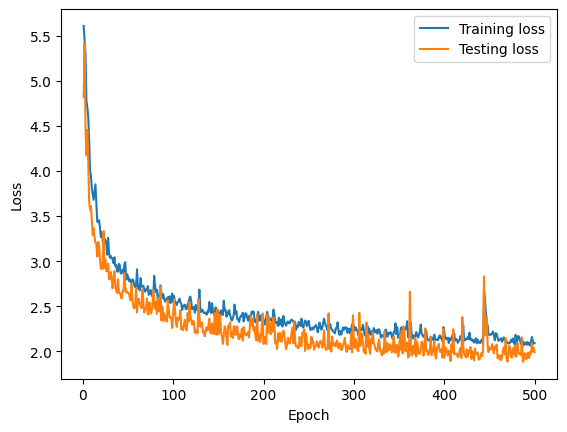

In [57]:
num_epochs = 500

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:500], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:500], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

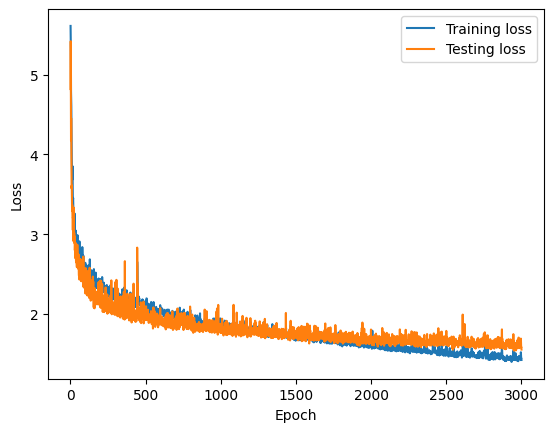

In [58]:
num_epochs = 3000

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:3000], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:3000], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [59]:
torch.save(model,"GNN_PIL_TEAM_3K_xyz.pth")

In [35]:
modelv2 = torch.load("GNN_PIL_TEAM_3K_xyz.pth")
modelv2.eval()

MetaNet(
  (input): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=27, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
    (node_mlp_2): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    global_model=None
  )
  (output): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=384, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=256, out_features=

In [36]:
#evaluate the model on the test set
test_epoch_losses= evaluate(test_loader)
print(f"Len of Validation loss: {len(test_epoch_losses)}, Average loss: {float(np.sum(test_epoch_losses))/len(test_epoch_losses)}")
valid_losses.append(np.mean(test_epoch_losses))





Len of Validation loss: 80, Average loss: 8.183244036138058


NameError: name 'valid_losses' is not defined

In [ ]:
(np.array(test_epoch_losses)).shape

NameError: name 'test_epoch_losses' is not defined

In [66]:
#calculate the mean squared error for the test set
print(np.mean(test_epoch_losses))
#calculate the mean absolute error for the test set
print(np.mean(np.sqrt(test_epoch_losses)))
#calculate the root mean squared error for the test set
print(np.sqrt(np.mean(test_epoch_losses)))



1.4150068789720536

1.1274293167175533

1.1895406167811393


In [26]:
#evaluate model and predict on the test set
np.set_printoptions(suppress=True)
#dont print tensor in scientific notation
torch.set_printoptions(sci_mode=False)
modelv2.eval()
for data in test_loader:
    print(data.shape)
    # out = modelv2(data.to(device))
    # #print the predicted values and the actual values side by side for comparison

    # print(out)
    # print(data.y)
    break


NameError: name 'modelv2' is not defined

In [68]:
#evaluate model and predict on the test set
np.set_printoptions(suppress=True)
#dont print tensor in scientific notation
torch.set_printoptions(sci_mode=False)
modelv2.eval()
for data in test_loader:
    out = modelv2(data.to(device))
    #print the predicted values and the actual values side by side for comparison
    print(torch.cat((out.view(-1,1),data.y.view(-1,1)),1))
    


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2340x27 and 25x128)